In [1]:
import pandas as pd
import numpy as np

from utils import SimulateData

from IPython.display import Image
import matplotlib.pyplot as plt
import seaborn as sns

# SSRT by SSD

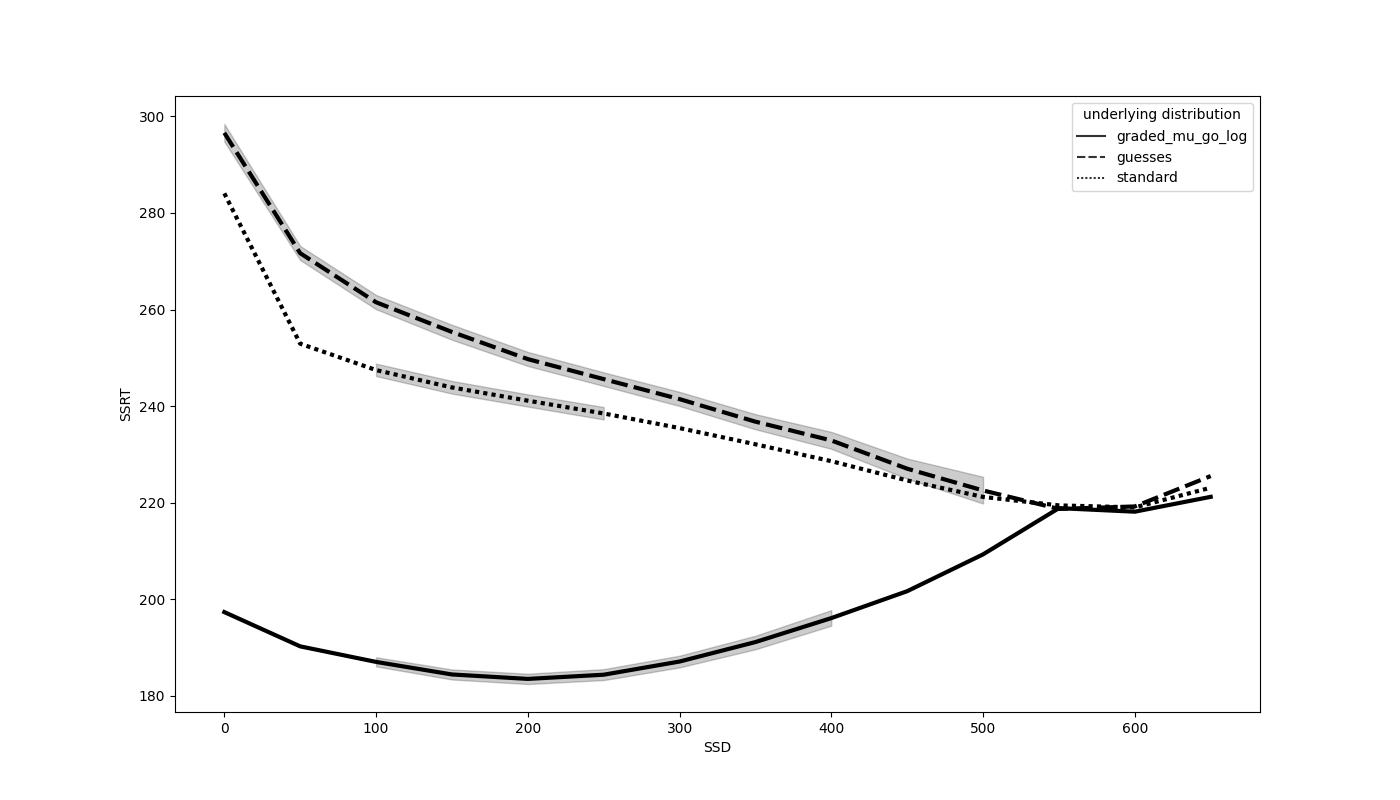

In [2]:
Image('figures/SSRT_by_SSD.png')

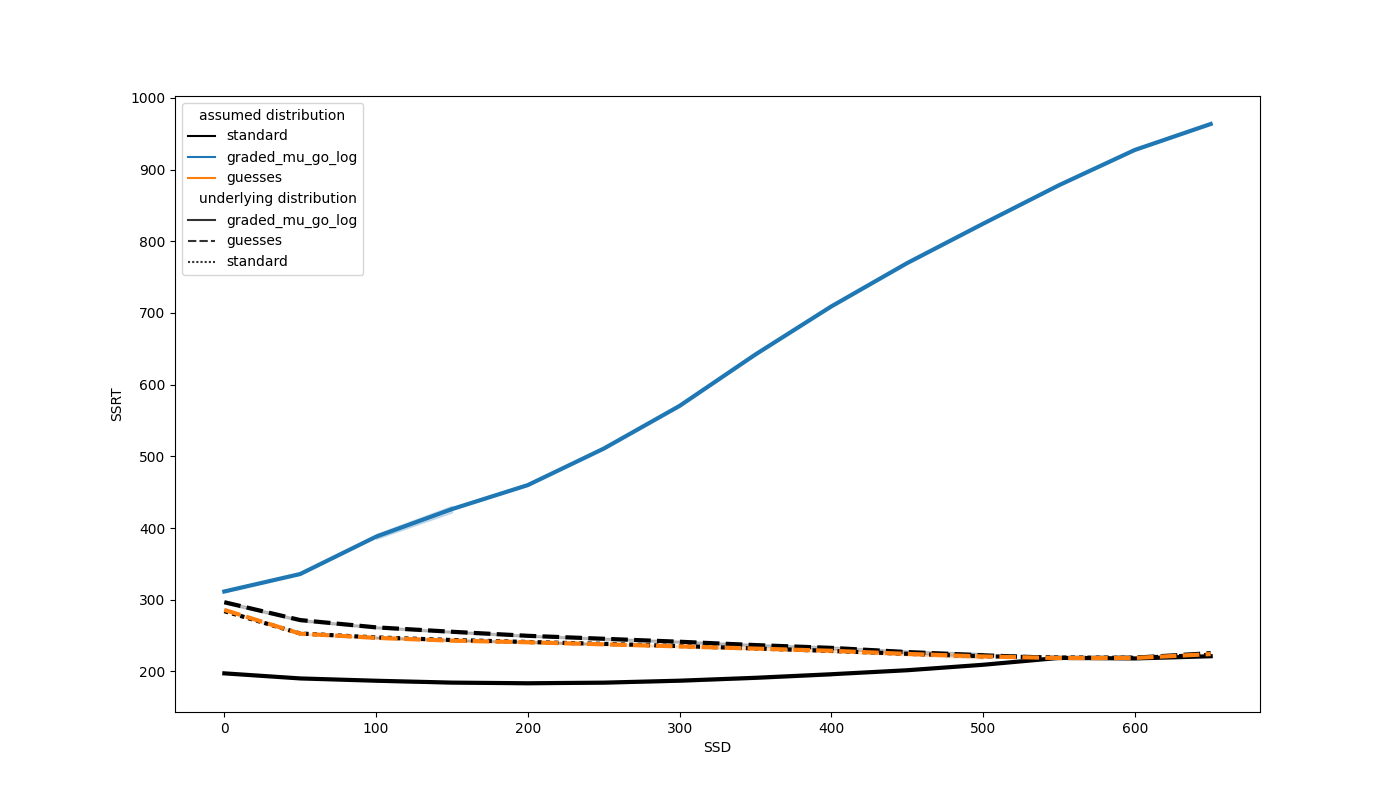

In [3]:
Image('figures/SSRT_by_SSD_supplement.png')

# Inhibition Function

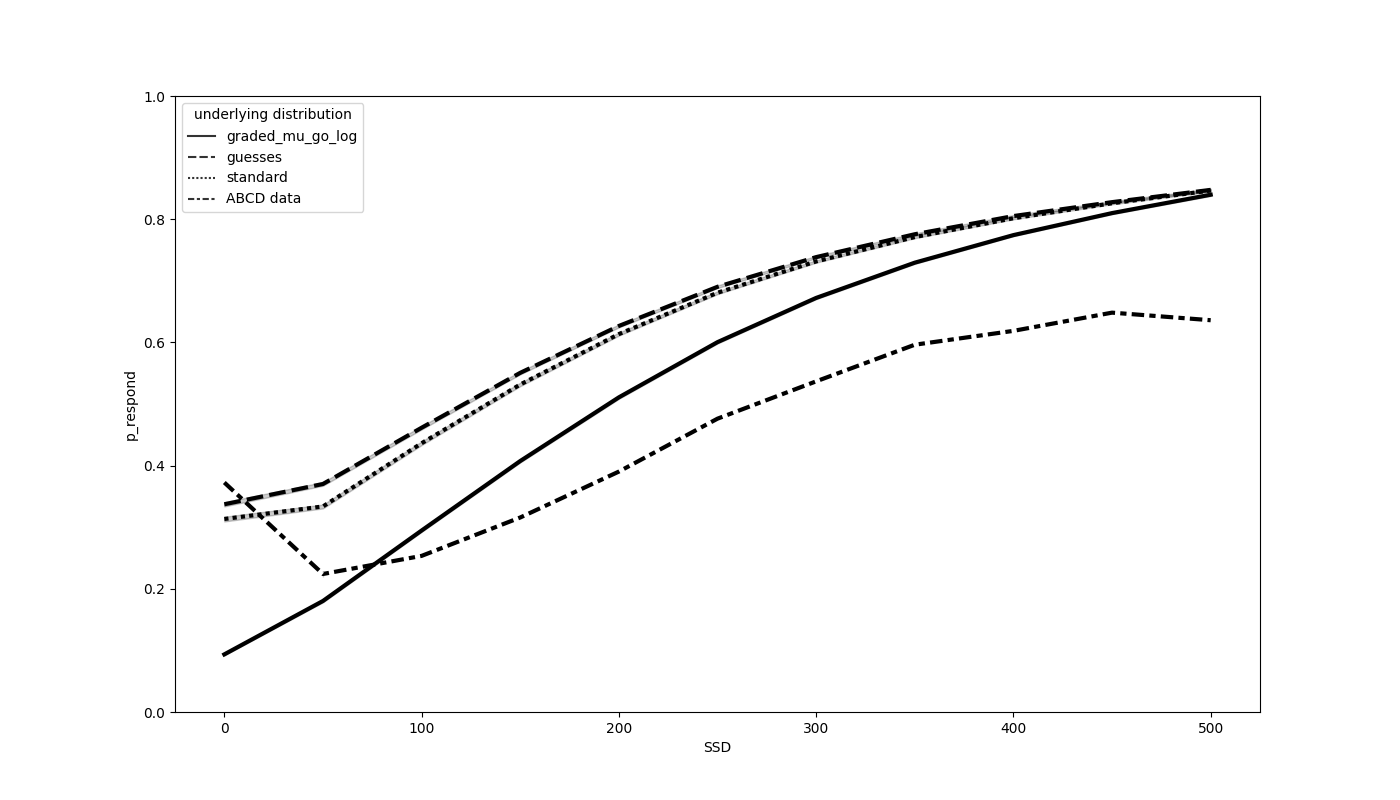

In [4]:
Image('figures/inhibition_function.png')

# Individual Differences

In [5]:
df = pd.read_csv('ssrt_metrics/expected_ssrts.csv', index_col=0)

# reformatting - was multiindex
df.columns = [ f'gen-{gen}_SSRT-{ssrt}' for gen, ssrt in zip(df.loc['underlying distribution', :].values, df.columns)]
df = df.drop(['underlying distribution', 'NARGUID'])

for col in df.columns:
    df[col] = df[col].astype(float)


In [6]:
df.corr(method='spearman')

,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2,gen-graded_mu_go_log_SSRT-guesses,gen-guesses_SSRT-guesses.1,gen-standard_SSRT-guesses.2,gen-graded_mu_go_log_SSRT-graded_mu_go_log,gen-guesses_SSRT-graded_mu_go_log.1,gen-standard_SSRT-graded_mu_go_log.2
gen-graded_mu_go_log_SSRT-standard,1.000000,0.948545,0.897982,0.977127,0.884566,0.777459,0.617012,0.601096,0.521296
gen-guesses_SSRT-standard.1,0.948545,1.000000,0.947992,0.941214,0.957298,0.847537,0.691924,0.711344,0.636124
gen-standard_SSRT-standard.2,0.897982,0.947992,1.000000,0.937659,0.976558,0.957862,0.763985,0.802750,0.757458
gen-graded_mu_go_log_SSRT-guesses,0.977127,0.941214,0.937659,1.000000,0.933853,0.866566,0.677651,0.679626,0.619609
gen-guesses_SSRT-guesses.1,0.884566,0.957298,0.976558,0.933853,1.000000,0.952514,0.773271,0.819615,0.774317
gen-standard_SSRT-guesses.2,0.777459,0.847537,0.957862,0.866566,0.952514,1.000000,0.796322,0.858766,0.847821
gen-graded_mu_go_log_SSRT-graded_mu_go_log,0.617012,0.691924,0.763985,0.677651,0.773271,0.796322,1.000000,0.975593,0.954713
gen-guesses_SSRT-graded_mu_go_log.1,0.601096,0.711344,0.802750,0.679626,0.819615,0.858766,0.975593,1.000000,0.989100
gen-standard_SSRT-graded_mu_go_log.2,0.521296,0.636124,0.757458,0.619609,0.774317,0.847821,0.954713,0.989100,1.000000


In [7]:
df.filter(regex='SSRT-standard').corr(method='spearman')

,gen-graded_mu_go_log_SSRT-standard,gen-guesses_SSRT-standard.1,gen-standard_SSRT-standard.2
gen-graded_mu_go_log_SSRT-standard,1.000000,0.948545,0.897982
gen-guesses_SSRT-standard.1,0.948545,1.000000,0.947992
gen-standard_SSRT-standard.2,0.897982,0.947992,1.000000


# Plot graded Mu Go function

In [8]:
SSDs = np.arange(0,650, 5)

simulator = SimulateData()
mu_gos = [[i, simulator._log_mu_go(1, i)] for i in SSDs]

/Users/henrymj/Documents/ABCD_simulations/utils.py:281: RuntimeWarning: divide by zero encountered in log
  return self._at_least_0((np.log(SSD/max_SSD)/4+1) * mu_go)


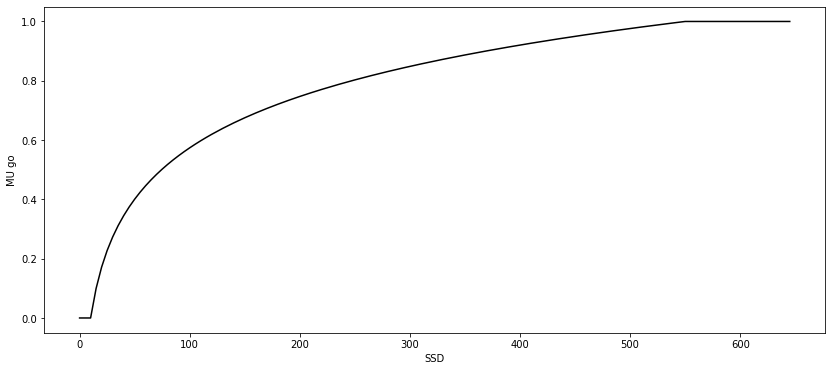

In [9]:
fig,ax = plt.subplots(1,1, figsize=(14, 6))

_ = sns.lineplot(x='SSD', y='MU go', color='k', data=pd.DataFrame(mu_gos, columns=['SSD', 'MU go']))
plt.savefig('figures/graded_mu_go_function.png')